In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings

In [2]:
df=pd.read_csv('Credit_score_cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  int64  
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  int64  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  int64  
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  int64  
 13  Credit_Mix                100000 non-null  ob

In [4]:
df.head()

,Customer_ID,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Last_Loan_9,Last_Loan_8,Last_Loan_7,Last_Loan_6,Last_Loan_5,Last_Loan_4,Last_Loan_3,Last_Loan_2,Last_Loan_1,Credit_Score
0,CUS_0x98ed,31,Journalist,22229.060,1672.421667,6,4,5.0,3,10,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Debt Consolidation Loan,Standard
1,CUS_0x36b4,43,Musician,17060.705,1685.725417,8,3,11.0,4,24,...,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Auto Loan,Standard
2,CUS_0x105b,24,Accountant,34428.210,2575.017500,2,4,8.0,0,3,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Good
3,CUS_0x4c4a,21,Accountant,12613.920,1155.160000,4,6,13.0,3,14,...,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Personal Loan,Student Loan,Home Equity Loan,Standard
4,CUS_0x612f,31,Journalist,34775.160,3048.930000,7,9,25.0,5,20,...,No Loan,No Loan,No Loan,No Loan,Auto Loan,Mortgage Loan,Auto Loan,Payday Loan,Not Specified,Poor


In [5]:
df.nunique()

Customer_ID                  12500
Age                             43
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13233
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Delay_from_due_date             73
Num_of_Delayed_Payment          29
Changed_Credit_Limit          4375
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            2
Total_EMI_per_month          11284
Amount_invested_monthly      92646
Payment_Behaviour                6
Monthly_Balance              98956
Last_Loan_9                     10
Last_Loan_8                     10
Last_Loan_7                     10
Last_Loan_6                     10
Last_Loan_5                     10
Last_Loan_4                     10
Last_Loan_3         

In [6]:
target = 'Credit_Score'
category_column = []
numberical_column = []
two_val = []
excluded_columns = 'Customer_ID'
for col in df.columns:
    if col not in excluded_columns and col != target:
        if df[col].nunique() == 2:
            two_val.append(col)
        elif df[col].dtype == 'O':
            category_column.append(col)
        else:
            numberical_column.append(col)

In [7]:
category_column

['Occupation',
 'Credit_Mix',
 'Payment_Behaviour',
 'Last_Loan_9',
 'Last_Loan_8',
 'Last_Loan_7',
 'Last_Loan_6',
 'Last_Loan_5',
 'Last_Loan_4',
 'Last_Loan_3',
 'Last_Loan_2',
 'Last_Loan_1']

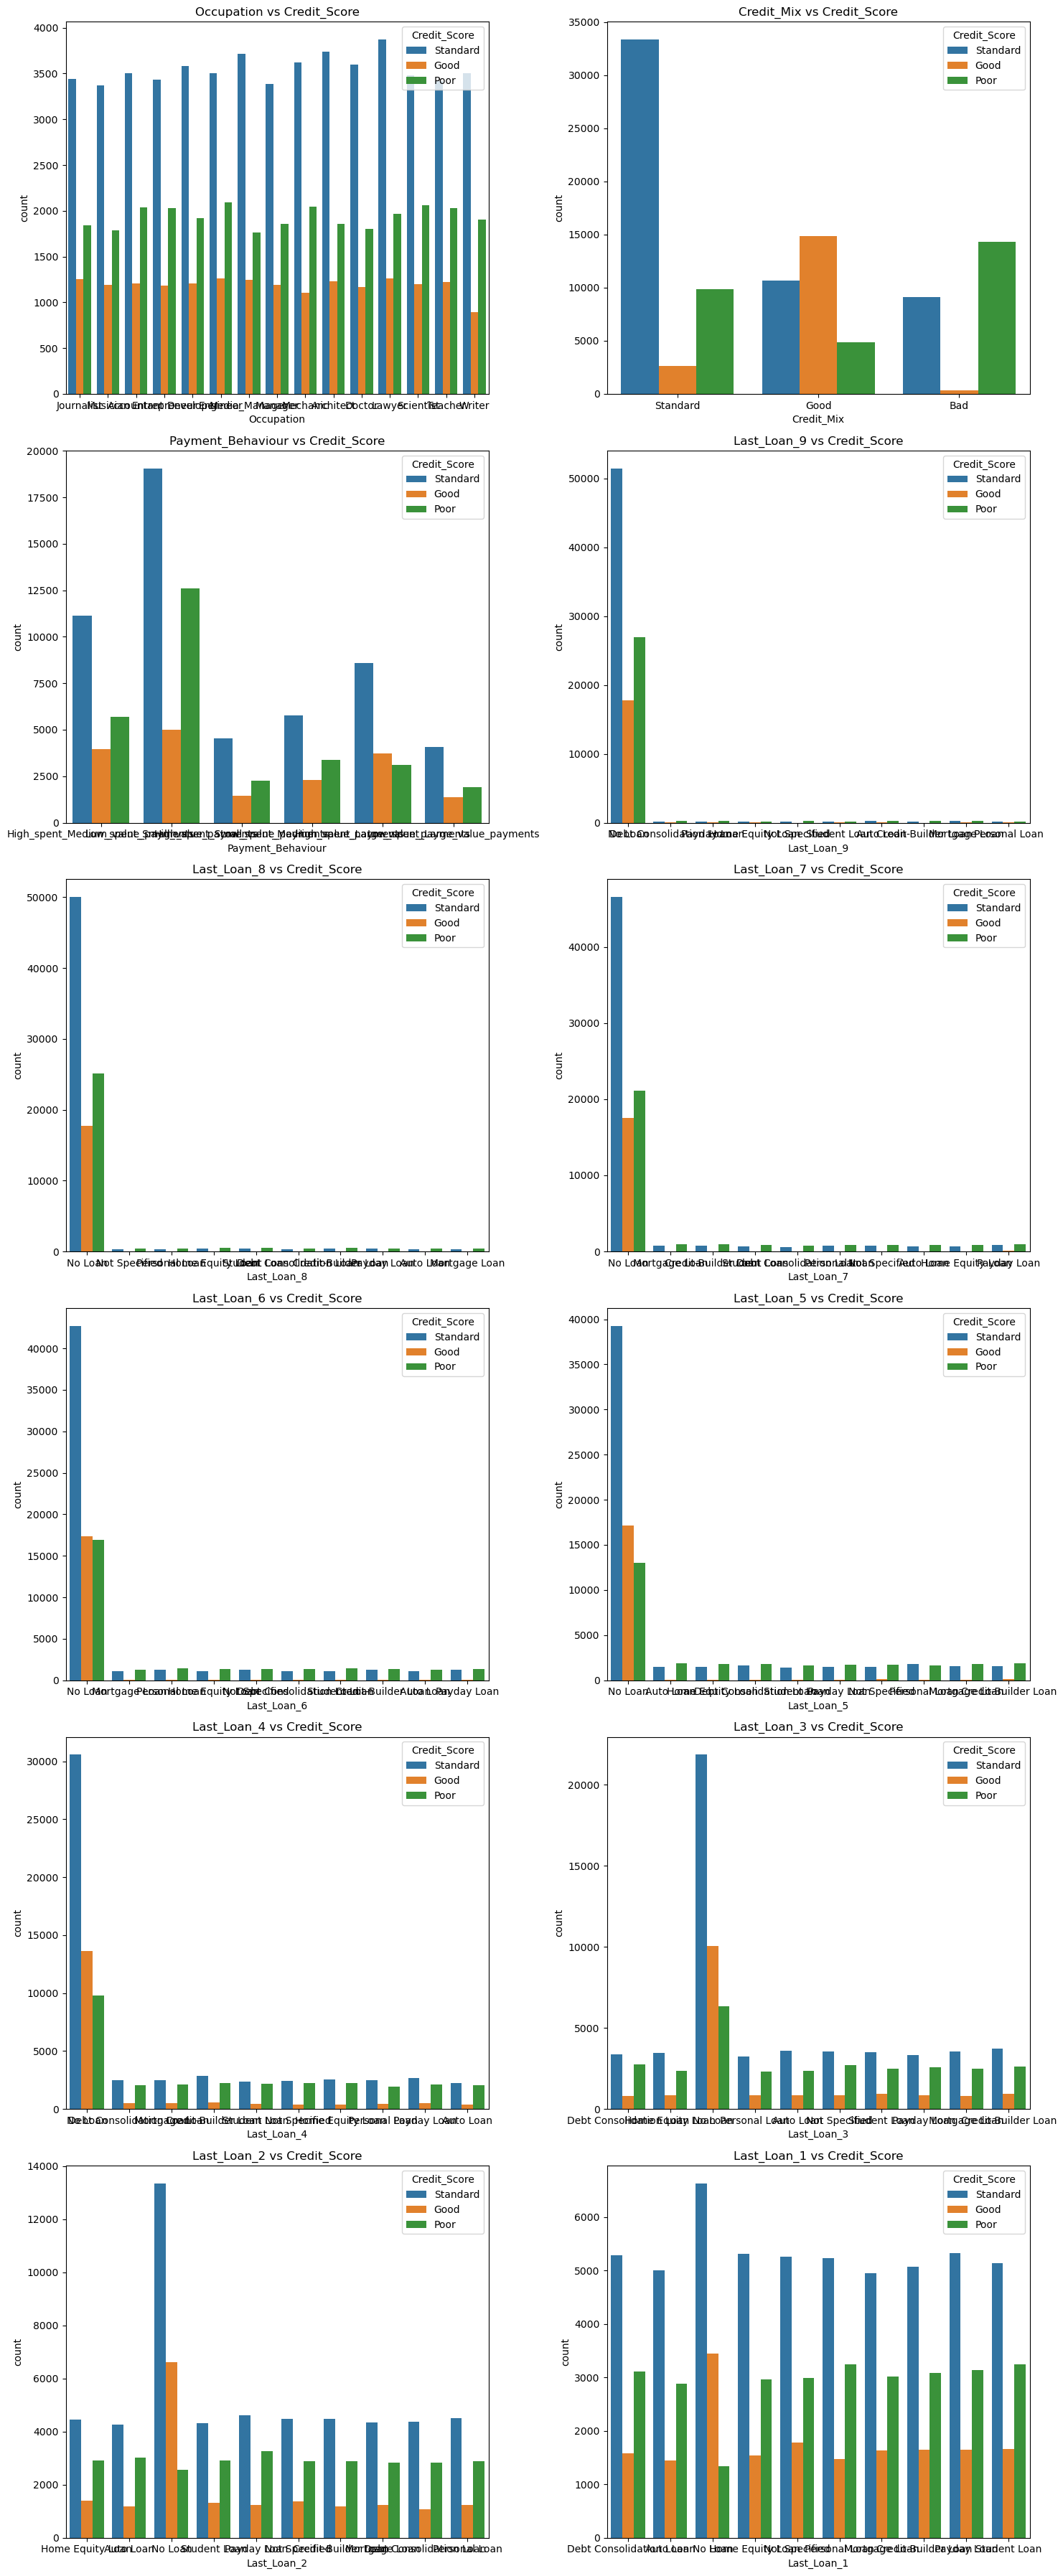

In [8]:

rows = math.ceil(len(category_column)/2)
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 6*rows))
axes = axes.flatten()

for i, col in enumerate(category_column):
    sns.countplot(data=df, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')
    axes[i].legend(title=target, loc='upper right')
if len(category_column) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [9]:
numberical_column

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance']

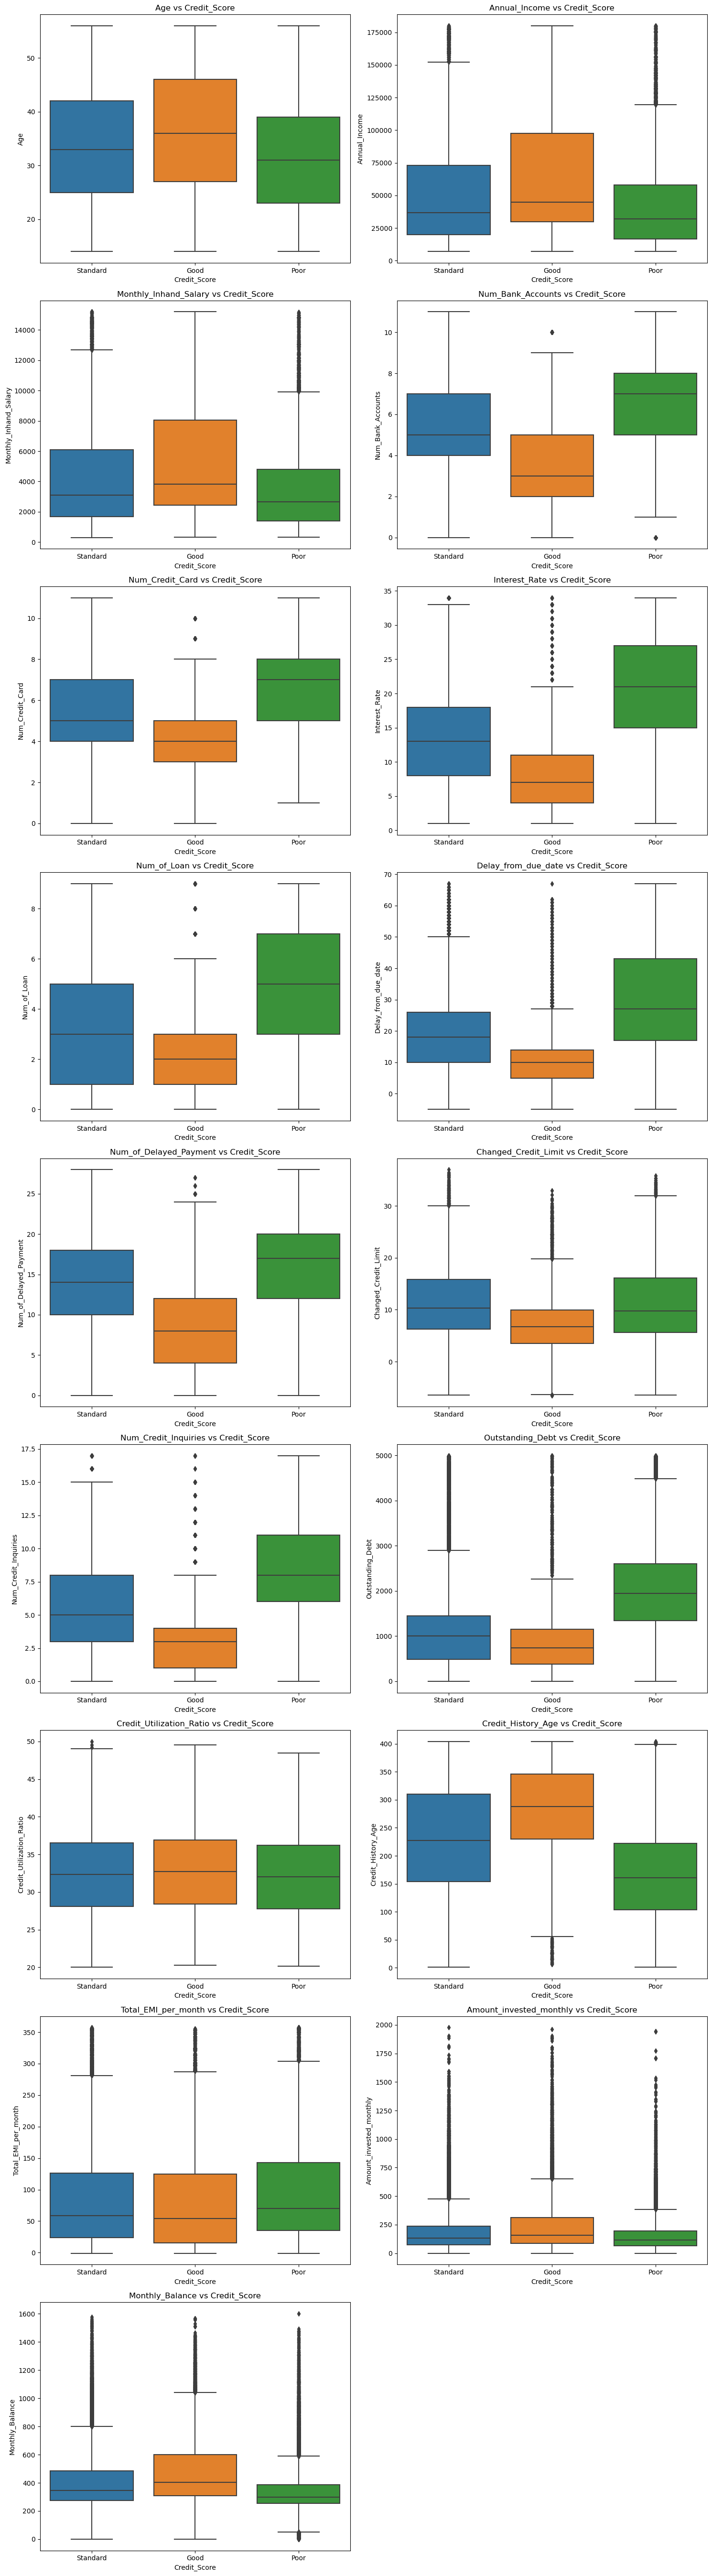

In [10]:
rows = math.ceil(len(numberical_column) / 2)  # Calculate number of rows required

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 6*rows))

# Flatten axes to make it easier to iterate over
axes = axes.flatten()

# Plot the boxplots
for i, col in enumerate(numberical_column):
    sns.boxplot(x=target, y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')

# Turn off the unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

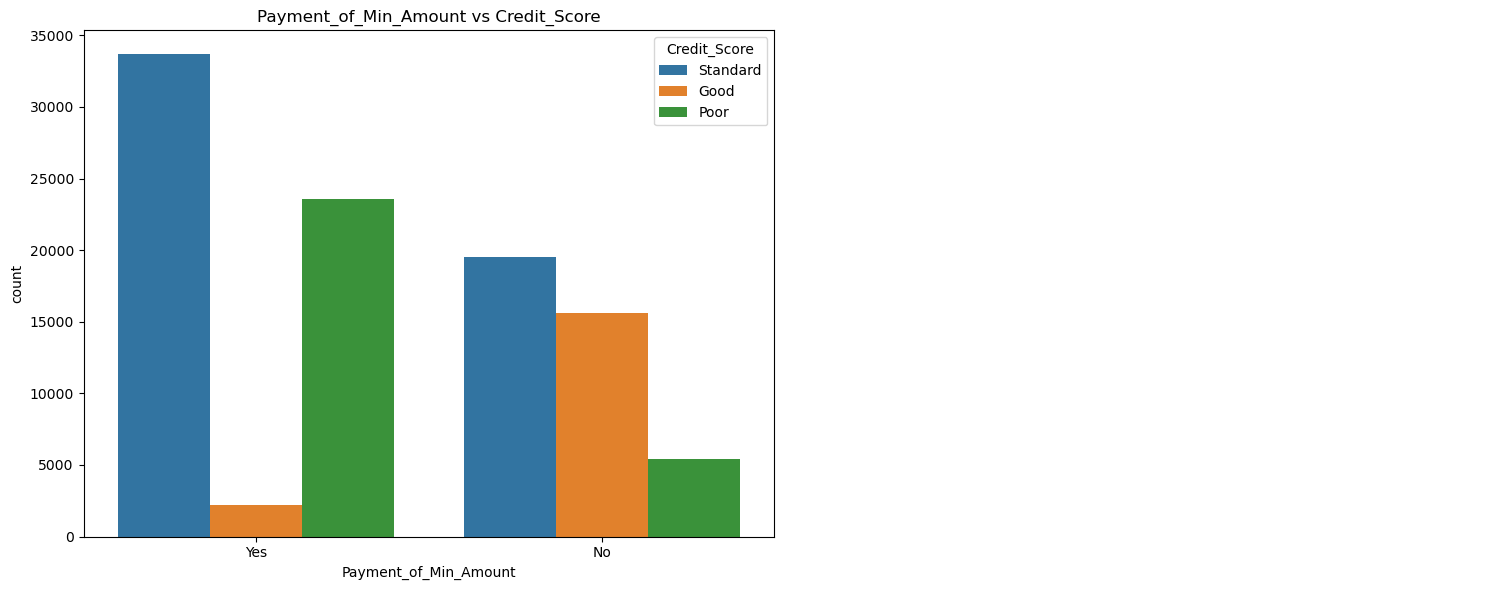

In [11]:
rows = math.ceil(len(two_val) / 2)

# Create subplots (multiple rows and 2 columns)
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 6*rows))

# Flatten axes to make it easier to iterate over
axes = axes.flatten()

# Loop through numerical columns to create the countplots
for i, col in enumerate(two_val):
    sns.countplot(data=df, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f'{col} vs {target}')
    axes[i].legend(title=target, loc='upper right')

# Turn off unused axes if there are any
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
import joblib

In [13]:
df['Credit_Score'].replace({'Poor':0,'Standard':1, 'Good': 2}, inplace=True)

In [106]:
def drop_columns(X):
    return X.drop(columns=excluded_columns)

In [108]:
numerical_transformer = Pipeline([
    ('imput',SimpleImputer(strategy='median')),
    ('scaling', StandardScaler())
])
categorical_transformer = Pipeline([
    ('imput', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder())
])
two_val_transformer = Pipeline([
    ('imput', SimpleImputer(strategy='most_frequent')),
    ('encoding', OrdinalEncoder())
])

In [110]:
preprocessor = ColumnTransformer([
    ('numerical',  numerical_transformer,numberical_column),
    ('categorical', categorical_transformer,category_column),
    ('ordinal', two_val_transformer,two_val)
])
pipeline = Pipeline([
    ('drop', FunctionTransformer(drop_columns)),
    ('prepro', preprocessor)
])

In [112]:
preprocessor.fit_transform(df)

<100000x132 sparse matrix of type '<class 'numpy.float64'>'
	with 2959432 stored elements in Compressed Sparse Row format>

In [114]:
joblib.dump(pipeline, 'prepprocessor_credit_score.pkl')

['prepprocessor_credit_score.pkl']

In [116]:
x = df.drop(columns=target)
y = df[target]
x_transformed = pipeline.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y,test_size=0.2, random_state=42)

In [118]:
svm_model = Pipeline([
    ('drop_column', FunctionTransformer(drop_columns)),
    ('preprocessing', preprocessor),
    ('model', SVC(kernel='sigmoid'))
])

In [120]:
svm_model

Pipeline(steps=[('drop_column',
                 FunctionTransformer(func=<function drop_columns at 0x0000029CFA83A840>)),
                ('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Annual_Income',
                                                   'Monthly_Inhand_Salary',
                                                   'Num_Bank_Accounts',
                                                   'Num_Credit_Card',
                                                   'Interest_Ra...
                                                                   OneHotEncoder())]),
                                                  ['Occupation', 'Credit_Mix',
                                                   'Payment_Behaviour',
                                                   'Last_Loan_9', 'Last_Loan_8',
                                                   'Last_Loan_7', 'Last_Loan_6',
                                                   'Last_Loan_5', 'Last_Loan_4',
                                                   'Last_Loan_3', 'Last_Loan_2',
                                                   'Last_Loan_1']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OrdinalEncoder())]),
                                                  ['Payment_of_Min_Amount'])])),
                ('model', SVC(kernel='sigmoid'))])

In [122]:
svm_model.fit(x_train,y_train)

AttributeError: 'csr_matrix' object has no attribute 'drop'

In [ ]:
input_shape = x_train.shape[1]

In [58]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(input_shape,)),
    Dense(256, activation="relu"), 
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(8, activation="relu"),
    Dense(2, activation='sigmoid') ### 
])

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [84]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test))

Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\ProgramData\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\ProgramData\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\ProgramData\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\User\AppData\Local\Temp\ipykernel_9504\46669731.py", line 2, in <module>

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 132, in multi_step_on_iterator

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 113, in one_step_on_data

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 60, in train_step

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\trainer.py", line 383, in _compute_loss

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\trainer.py", line 351, in compute_loss

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\compile_utils.py", line 691, in __call__

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\compile_utils.py", line 700, in call

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\loss.py", line 67, in __call__

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py", line 33, in call

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\losses\losses.py", line 2246, in sparse_categorical_crossentropy

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\ops\nn.py", line 1963, in sparse_categorical_crossentropy

  File "C:\Users\User\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 2).  Label values: 0 1 2 0 0 1 2 1 0 0 1 2 1 0 2 1 0 1 0 0 1 0 0 2 0 0 1 2 1 1 0 1
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_5298]